In [10]:
import warnings
warnings.filterwarnings('ignore')

### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

import pandas as pd

data = pd.read_csv('ks_crashed.csv')

data.head(20)

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,600.00
1,Me & You Coordinating Sunglasses- Optical Qual...,NaN,USD,502.00,10000.00
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,1400.00
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,10000.00
4,The Seer and the Sword,Film & Video,USD,0.00,10000.00
5,The Wild World of Ogots - YOU Become an Ogot (...,Publishing,USD,1305.00,1075.00
6,"VIGATAR, the fitness-machine that lets you pla...",Technology,EUR,4395.53,131879.15
7,Escape Room Palm Springs - Real Life Escape Game,Games,NaN,2553.00,7500.00
8,The Grrrl has a new album called 'Through Ruin...,Music,USD,185.00,178.00
9,The Tile House,Art,NaN,7360.00,7000.00


In [232]:
### Сколько потеряем данных, если просто дропнем все строки с NaN?

print(f'Потеряем {data.shape[0] - data.dropna().shape[0]} объектов')

print(f'Это {round(100*(data.shape[0] - data.dropna().shape[0])/data.shape[0], 1)}% выборки')

Потеряем 89785 объектов
Это 27.1% выборки


In [23]:
data.isna().sum()

Название                  3
Главная категория         0
Валюта                    0
Собрано в долларах        0
Цель в долларах       33143
dtype: int64

In [20]:
### Начнем с категориальных  признаков!
### Прием №1: Заполнить пропуски самым популярным классом

popular_category = data['Главная категория'].value_counts().index[0]
data['Главная категория'] = data['Главная категория'].fillna(popular_category)

In [22]:
### Прием №2: Заполнить пропуски новой категорией

data['Валюта'] = data['Валюта'].fillna('Неизвестная валюта')

In [26]:
### Перейдем теперь к нашему единственному вещественному признаку!

mean = data['Цель в долларах'].mean()
median = data['Цель в долларах'].median()

data['Цель в долларах'].fillna(mean)

0           600.000000
1         10000.000000
2          1400.000000
3         10000.000000
4         10000.000000
              ...     
331670     9000.000000
331671     2501.450000
331672     1500.000000
331673    42352.372792
331674     4000.000000
Name: Цель в долларах, Length: 331675, dtype: float64

In [28]:
### А давайте будем заполнять пропуски, смотря на похожие объекты!
### Например, ориентируясь на Валюту

grouped_means = data.groupby('Главная категория')['Цель в долларах'].transform("mean")

In [29]:
data['Цель в долларах'] = data['Цель в долларах'].fillna(grouped_means)

In [30]:
### С неймингами ничего не поделаешь. Их можно игнорировать или дропнуть

data.isna().sum()

Название              3
Главная категория     0
Валюта                0
Собрано в долларах    0
Цель в долларах       0
dtype: int64

### Исследование выбросов

In [239]:
data

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,600.000000
1,Me & You Coordinating Sunglasses- Optical Qual...,Отсутствующая категория,USD,502.00,10000.000000
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,1400.000000
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,10000.000000
4,The Seer and the Sword,Film & Video,USD,0.00,10000.000000
...,...,...,...,...,...
331670,Launch Ladies - A children's book about the Wo...,Publishing,USD,18808.00,9000.000000
331671,TurnAround//The End Needs A Beginning Album Re...,Music,GBP,0.00,2501.450000
331672,Celtic inspired band looking to move forward w...,Music,USD,0.00,1500.000000
331673,Listening & Speaking in Virtual Reality: 5 Int...,Technology,USD,200.00,41059.995841


In [32]:
from matplotlib import pyplot as plt

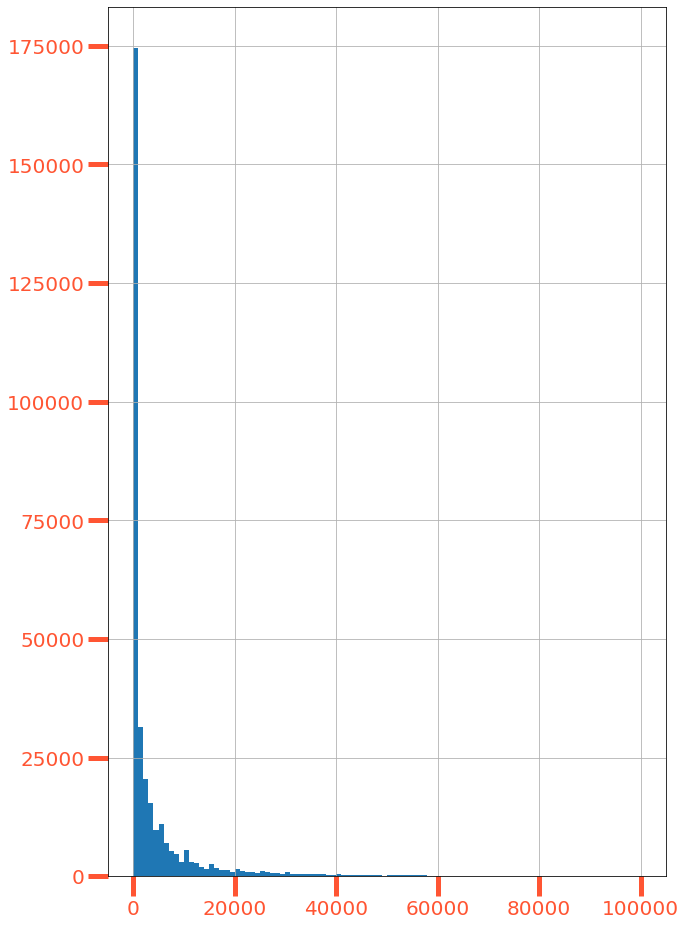

In [34]:
### Нарисуем гистограмму 

fig = plt.figure()
fig.set_size_inches((10, 16))

data[data['Собрано в долларах']<100000]["Собрано в долларах"].hist(bins=100)

plt.show()

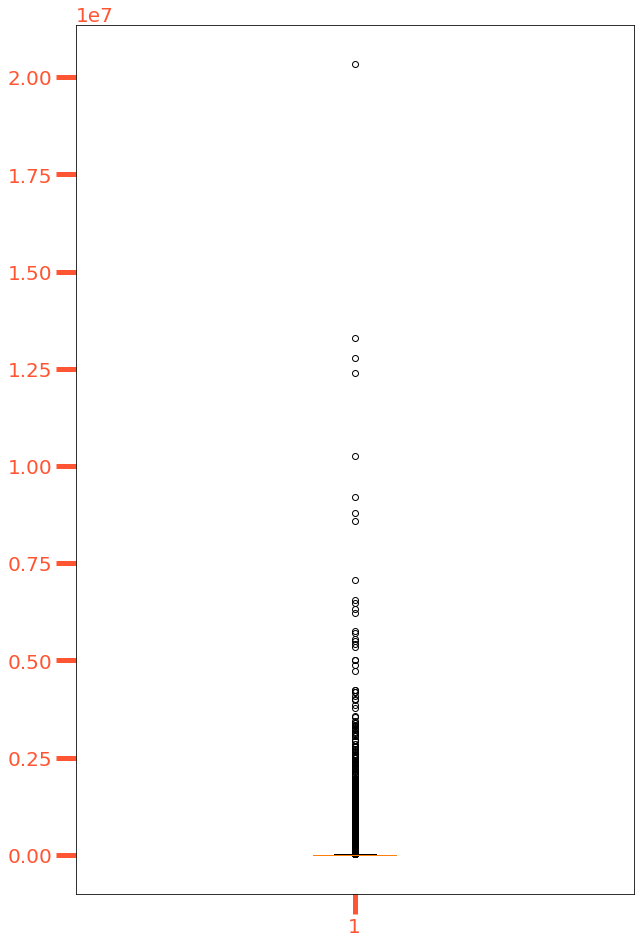

In [240]:
### Нарисуем ящик с усами
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(data['Собрано в долларах'].values)

plt.show()

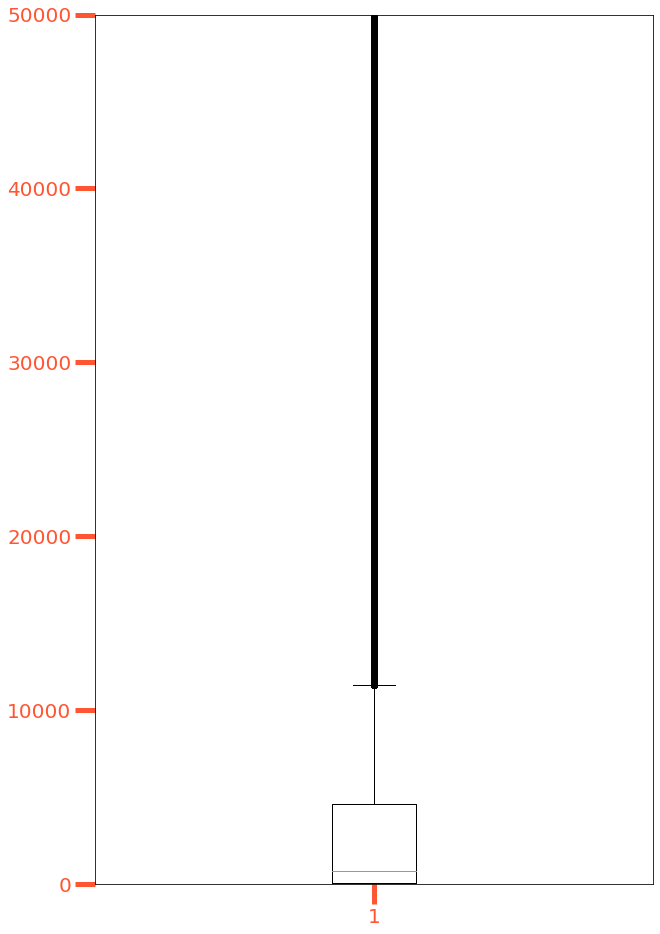

In [241]:
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(data['Собрано в долларах'].values)
plt.ylim(0, 50000)

plt.show()

In [42]:
### Расчитаем длину усиков
q_low = data['Собрано в долларах'].quantile(0.25)
q_high = data['Собрано в долларах'].quantile(0.75)

tentacle_length = q_high - q_low

In [47]:
tentacle_length

upper_tentacle = q_high + 3 * tentacle_length

In [48]:
upper_tentacle

18282.0

In [49]:
### Уберем все данные, в которых таргет - за пределами верхнего усика
data[data['Собрано в долларах']<upper_tentacle]

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,600.000000
1,Me & You Coordinating Sunglasses- Optical Qual...,Film & Video,USD,502.00,10000.000000
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,1400.000000
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,10000.000000
4,The Seer and the Sword,Film & Video,USD,0.00,10000.000000
...,...,...,...,...,...
331669,Jared Horgan's Huge Opportunity,Music,USD,505.00,8000.000000
331671,TurnAround//The End Needs A Beginning Album Re...,Music,GBP,0.00,2501.450000
331672,Celtic inspired band looking to move forward w...,Music,USD,0.00,1500.000000
331673,Listening & Speaking in Virtual Reality: 5 Int...,Technology,Неизвестная валюта,200.00,98961.220521


## TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
### Зафиттим наши данные в TfidfVectorizer
data = data.dropna()


tfidf = TfidfVectorizer()
tfidf.fit(data['Название'])

TfidfVectorizer()

In [54]:
### Посмотрим как выглядит наш первый документ (первое описание)
first_document = data['Название'][0]
first_document

'Don\'t Call it a Comeback "Telescopes"'

In [57]:
### Векторизуем данное описание через tf-idf
tfidf.transform([first_document])
tfidf.transform([first_document]).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [65]:
tfidf.get_feature_names()

['00',
 '000',
 '000001',
 '00001',
 '00006',
 '0001',
 '0002',
 '000bp',
 '000ft',
 '000km',
 '000mah',
 '001',
 '002',
 '002303200',
 '003',
 '004',
 '005',
 '007',
 '009',
 '00pm',
 '00tz',
 '01',
 '012',
 '013',
 '0141ôçö',
 '014352',
 '016',
 '01am',
 '01ôçø',
 '02',
 '020',
 '02ôçö',
 '03',
 '030',
 '030412',
 '04',
 '04y',
 '05',
 '054',
 '058',
 '06',
 '0625c',
 '068',
 '07',
 '075',
 '08',
 '081',
 '086',
 '089',
 '09',
 '096',
 '09ôäó',
 '0blio',
 '0c370t',
 '0ct',
 '0f',
 '0famm100',
 '0gravity',
 '0h',
 '0km',
 '0kw',
 '0l',
 '0m',
 '0ne',
 '0nehundred1',
 '0qf',
 '0w',
 '0x',
 '0xyz',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000mah',
 '1000ft',
 '1000km',
 '1000mortel',
 '1000s',
 '1000timesyes',
 '1000v',
 '1000w',
 '1001',
 '1002',
 '10027',
 '10036',
 '1008',
 '100anywhere',
 '100bracelets100days',
 '100cities',
 '100days',
 '100daysians',
 '100daysoflittlepoems',
 '100drawings100days',
 '100faces',
 '100giftcreations',
 '100k',
 '100lb',
 '100lbs',
 '100m',
 '1

In [68]:
### Посмотрим на содержимое этого вектора
df = pd.DataFrame(tfidf.transform([first_document]).T.todense(),
                  index=tfidf.get_feature_names(),
                  columns=['tfidf'])

df.sort_values('tfidf', ascending=False)[:50]

,tfidf
telescopes,0.613898
comeback,0.503584
call,0.396683
don,0.361875
it,0.284996
pilates,0.000000
pilacca,0.000000
pilafoot,0.000000
pilar,0.000000
pilares,0.000000


In [71]:
df[df.values>0]

,tfidf
call,0.396683
comeback,0.503584
don,0.361875
it,0.284996
telescopes,0.613898
